In [43]:
import numpy as np
import astropy.io.fits
import matplotlib.pyplot as plt
import scipy as sym 
import scipy.integrate as integrate
from scipy import log,exp,sqrt,stats
from astropy import units as u
import astropy.constants as const
from scipy.optimize import curve_fit
from astropy.stats import biweight_location, biweight_scale, bootstrap
from astropy.cosmology import LambdaCDM
import astropy.units as u
from astropy.coordinates import SkyCoord
from scipy.interpolate import interp1d
import scipy.stats as stats
from astropy.stats import sigma_clip
c=const.c.to("km/s")
%matplotlib inline

cosmos = LambdaCDM(H0=67.77* u.km / u.Mpc / u.s, Om0=0.307115, Ode0=0.692885)  # define cosmology on the basis of simulation

In [44]:
my_file=astropy.io.fits.open('Most_massive_MD04.fits')
my_file.info()

Filename: Most_massive_MD04.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (5429,)   uint8   
  1  Joined        1 BinTableHDU    191   478R x 87C   [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, D]   


In [45]:
data= my_file[1].data

In [46]:
# Actual separation from the data
r=data.field('separation')
# Redshift  of the member galaxies
z=data.redshift_R_2
# Redshift at the center of the cluster
z_cluster=data.redshift_R_1[0]
ra=data.field('RA_2')
dec=data.field('DEC_2')
c1=ra*(np.pi/180)
c2=dec*(np.pi/180)
ra_cl=data.field('RA_1')[0]*np.pi/180
dec_cl=data.field('DEC_1')[0]*np.pi/180 #    

In [47]:
# Angular separation between two galaxy members inside the cluster.
#by using haversine method 
ra_gal = c1     # ra of the the galaxies in radian
dec_gal = np.pi/2. -c2  #dec of a galaxies in radian
ra_cl = ra_cl
dec_cl = np.pi/2. - (dec_cl)
y = 2*np.arcsin(np.sqrt(np.sin((dec_cl-dec_gal)/2.0)**2.0 +np.sin(dec_cl)*np.sin(dec_gal)*np.sin((ra_cl-ra_gal)/2.0)**2.0))

In [48]:
# From astropy inbuilt module separation
A=(SkyCoord(data.field('RA_2')*u.degree, data.field('DEC_2')*u.degree)) #c1 refers to the galaxies coordinates
B=(SkyCoord(data.field('RA_1')[0]*u.degree,data.field('DEC_1')[0]*u.degree)) #c2 refers to the co-ordinates of whole cluster
sep = A.separation(B)
x=sep.radian

In [49]:
# Transverse comoving distance
D=cosmos.comoving_distance(z_cluster) #angular diameter distance
D

<Quantity 1359.11821845 Mpc>

In [50]:
# Proper comoving distance 
cosmos.angular_diameter_distance(z_cluster)

<Quantity 1018.83829206 Mpc>

In [51]:
# The projected radius of the cluster 
r_proj=(x*D) # D is comoving distance
r_proj

<Quantity [0.        , 0.653907  , 0.92934215, 1.3412327 , 1.153795  ,
           0.2763704 , 0.6739774 , 0.51878834, 1.8473994 , 1.7479122 ,
           1.2408639 , 1.652392  , 1.0166501 , 0.7343631 , 0.33959126,
           0.7424164 , 0.5621374 , 1.0292071 , 0.49698797, 1.2006277 ,
           0.8836924 , 0.5792119 , 1.3041899 , 1.6352568 , 0.3415112 ,
           0.79491407, 0.6549678 , 1.4568411 , 1.2200326 , 1.6214244 ,
           0.4388141 , 1.861762  , 1.0699413 , 0.5726298 , 0.8735555 ,
           1.6514883 , 1.0992813 , 0.40161815, 0.5695408 , 0.9068446 ,
           1.225579  , 1.2694514 , 0.40737718, 1.2575157 , 1.3872527 ,
           0.7433225 , 1.616608  , 1.5194196 , 1.002745  , 1.7398868 ,
           0.7364302 , 1.4832829 , 1.1805164 , 1.4257118 , 0.60222703,
           0.5793561 , 1.2722664 , 1.137205  , 0.8597092 , 1.2236651 ,
           1.8346014 , 0.76140624, 0.78190243, 0.17811893, 0.6704759 ,
           1.3965582 , 0.36816698, 1.1985285 , 1.8087431 , 1.2919011 ,
      

In [52]:
H0=67.77
p=(c/H0)*(z+z_cluster)*np.sin(x/2)
np.sort(p)

<Quantity [0.        , 0.05767817, 0.07857895, 0.10584348, 0.15852553,
           0.1788963 , 0.18169041, 0.19144572, 0.1916767 , 0.1937173 ,
           0.22568403, 0.22916707, 0.2437905 , 0.24400224, 0.25944668,
           0.27934206, 0.28343582, 0.3004256 , 0.30113882, 0.30512372,
           0.31001052, 0.31175497, 0.3213645 , 0.32569382, 0.33509165,
           0.34910765, 0.3502797 , 0.35295463, 0.35454068, 0.35804155,
           0.3693106 , 0.37102854, 0.37693596, 0.37950918, 0.38235053,
           0.38634846, 0.39983052, 0.4003685 , 0.4005811 , 0.40662986,
           0.41514945, 0.4152705 , 0.41675255, 0.42214   , 0.42486897,
           0.43180132, 0.43255043, 0.43666777, 0.43863142, 0.44010973,
           0.44295332, 0.45599383, 0.4676192 , 0.4710443 , 0.47677395,
           0.47713274, 0.4902942 , 0.49231347, 0.4970772 , 0.4973584 ,
           0.5018197 , 0.50497025, 0.50555503, 0.513194  , 0.5205618 ,
           0.522236  , 0.52399033, 0.54010755, 0.5419617 , 0.54500085,
      

In [53]:
#(D*(z+z_cluster)*np.sin(x/2))

In [54]:
#np.sqrt(z_cluster**2-z**2)

In [55]:
#np.sort((c/H0)*(z-z_cluster))

In [56]:
cosmos.angular_diameter_distance(z)

<Quantity [1018.83822129, 1019.25651299, 1019.25695362, 1019.30880939,
           1018.63679416, 1018.80213922, 1017.95957701, 1019.45988275,
           1018.90368015, 1018.57016745, 1019.2226454 , 1019.01262911,
           1018.27126956, 1018.72229622, 1019.3911847 , 1019.19336566,
           1019.30229121, 1019.09695277, 1018.45774649, 1018.14284205,
           1018.35749465, 1018.07795516, 1019.06291364, 1019.12342305,
           1018.04820933, 1018.82340242, 1018.89750957, 1019.41719392,
           1018.16887572, 1018.45730558, 1019.15358566, 1019.01835842,
           1018.92670474, 1019.23569726, 1019.10666249, 1018.38238336,
           1018.52834671, 1019.08902035, 1019.34849372, 1018.05138766,
           1019.20236087, 1018.7433786 , 1019.16179087, 1018.4180358 ,
           1018.53990065, 1019.51657668, 1019.29902473, 1018.45501002,
           1018.59152534, 1018.97725108, 1018.38572878, 1018.59523429,
           1018.67958421, 1018.9942864 , 1019.75137771, 1018.62320457,
      

In [57]:
d_C = cosmos.comoving_distance(z)
dc_mpc = (d_C).value
dc_interpolation = interp1d(z, dc_mpc)
z_interpolation = interp1d(dc_mpc, z)


In [58]:
""" For the whole members  he actual estimation
"""
D_cl=cosmos.comoving_distance(z)
d_C = D_cl
dc_mpc = (d_C).value
dc_interpolation = interp1d(z, dc_mpc)
z_interpolation = interp1d(dc_mpc, z)

phi   = ( ra   - 180 ) * np.pi / 180.
theta = (dec + 90 ) * np.pi / 180.
rr    = dc_interpolation(z)
xx = rr * np.cos( phi) * np.sin( theta )
yy = rr * np.sin( phi) * np.sin( theta )
zz = rr * np.cos( theta )



In [59]:
d_x = cosmos.comoving_distance(data.redshift_R_1[0])
dx_mpc = (d_x).value
r1=dx_mpc

phi1   = ( data.field('RA_1')[0]   - 180 ) * np.pi / 180.
theta1 = (data.field('DEC_1')[0] + 90 ) * np.pi / 180.

x1 = r1 * np.cos( phi1) * np.sin( theta1 )
y1 = r1 * np.sin( phi1) * np.sin( theta1 )
z1 = r1 * np.cos( theta1 )


In [60]:
phi1   = ( data.field('RA_1')[0]   - 180 ) * np.pi / 180.
theta1 = (data.field('DEC_1')[0] + 90 ) * np.pi / 180.
x1 = r1 * np.cos( phi1) * np.sin( theta1 )
y1 = r1 * np.sin( phi1) * np.sin( theta1 )
z1 = r1 * np.cos( theta1 )

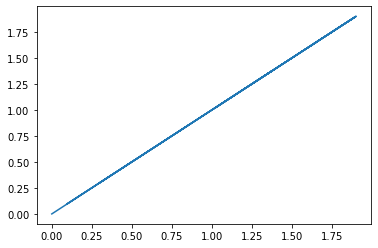

In [61]:
dis =np.sqrt((x1-xx)**2 + (y1-yy)**2 + (z1-zz)**2)

# So this is the comaparison of what i found from the method above and the values from the a separation table in fit file
plt.plot(dis,r)

In [62]:
# getting the projection using different formulas
#bb=np.sqrt(np.sort(rr**2+r1**2-(2*rr*r1)*(np.sin(theta)*np.sin(theta1)*np.cos(phi-phi1)+np.cos(theta)*np.cos(theta1))))
#distance=np.sqrt(rr**2+r1**2-2*rr*r1*np.cos(theta-theta1)-2*rr*r1*np.sin(theta)*np.sin(theta1)*(np.cos(phi-phi1)-1))


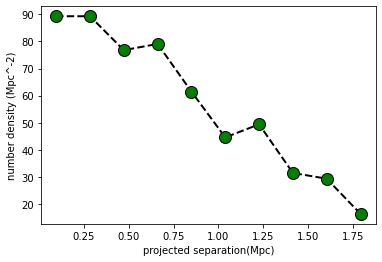

In [63]:
#Proj_radius
N,R=np.histogram(np.array(r_proj))
# Actual radius
nn,rs=np.histogram(np.array(dis))
rs

#Getting the number density profile in 2D 
n=N/(np.pi*(( R[1:]**2-R[:-1]**2)))

# central point of each separation 
R_proj = (R[1:] + R[:-1])/2
plt.plot(R_proj,n, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('projected separation(Mpc)')
plt.ylabel('number density (Mpc^-2)')  
plt.show()


In [64]:
Ns,ry=np.histogram(r)


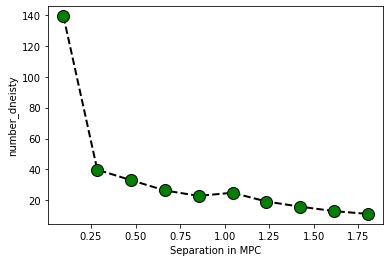

In [65]:
#Ns,rs=np.histogram(r)
number_density=nn/(np.pi*( 4* ( rs[1:]**3-rs[:-1]**3) / 3))
number_density
r_act = (rs[1:] + rs[:-1])/2.
#plt.xscale('log')
#plt.yscale('log')
plt.plot(r_act,number_density, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.xlabel('Separation in MPC')
plt.ylabel('number_dneisty')
plt.show()

In [66]:
dndR=np.array(np.gradient(n,R_proj))
dndR

array([ 2.09491884e-05, -3.30802433e+01, -2.70043251e+01, -4.04314492e+01,
       -9.11394626e+01, -3.19089182e+01, -3.46554699e+01, -5.30309941e+01,
       -3.99615745e+01, -6.86184716e+01])

/tmp/ipykernel_46169/4207932909.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  nu_all=[integrate.quad(nu, rs_i, 1.6,args=(rs_i))[0] for rs_i in rs]
/tmp/ipykernel_46169/4207932909.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))
/tmp/ipykernel_46169/4207932909.py:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  nu_all=[integrate.quad(nu, rs_i, 1.6,args=(rs_i))[0] for rs_i in rs]


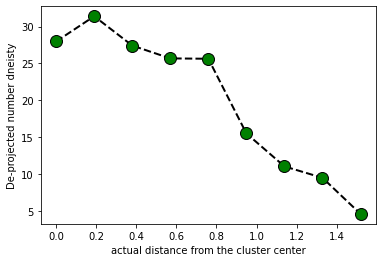

In [67]:
#Getting the derivative term of n wrt R_proj  ie dndR
dndR=np.array(np.gradient(n,R_proj))

"""
The interplation of dndR for solving the integral first of all 
Stacking the Proj and dndR

""" 
xx=np.hstack((np.array([0]),np.array(R_proj)))
yy=np.hstack((np.array(dndR[0]),np.array(dndR)))

# getting the interpolation
inter1=interp1d(xx, yy, bounds_error=False, fill_value=-10.)

# De-projection of the number density profile from 
# 2D to 3D using the Abel inversion equation

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

nu_all=[integrate.quad(nu, rs_i, 1.6,args=(rs_i))[0] for rs_i in rs]

# plotting the de-projected number density wrt actual distance from the cluster center

plt.plot(rs,nu_all, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.xlabel('actual distance from the cluster center')
plt.ylabel('De-projected number dneisty')
plt.show()

In [68]:
xx=np.hstack((np.array([0]),np.array(R_proj)))
xx

array([0.        , 0.09442704, 0.28328112, 0.47213519, 0.66098928,
       0.84984338, 1.03869748, 1.22755146, 1.41640568, 1.60525966,
       1.79411387])

In [69]:
yy=np.hstack((np.array(dndR[0]),np.array(dndR)))
yy

array([ 2.09491884e-05,  2.09491884e-05, -3.30802433e+01, -2.70043251e+01,
       -4.04314492e+01, -9.11394626e+01, -3.19089182e+01, -3.46554699e+01,
       -5.30309941e+01, -3.99615745e+01, -6.86184716e+01])

In [70]:
#inter1=interp1d(xx,yy)

In [71]:
inter1=interp1d(xx, yy, bounds_error=False, fill_value=-10.)

In [72]:
inter1(-6.0)

array(-10.)

In [73]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[9], 1.79,args=(rs[9]))[0]


5.83799202563786

In [74]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

nu_all=[integrate.quad(nu, rs_i, 1.6,args=(rs_i))[0] for rs_i in rs]
nu_all

/tmp/ipykernel_46169/1697269282.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  nu_all=[integrate.quad(nu, rs_i, 1.6,args=(rs_i))[0] for rs_i in rs]
/tmp/ipykernel_46169/1697269282.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))
/tmp/ipykernel_46169/1697269282.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  nu_all=[integrate.quad(nu, rs_i, 1.6,args=(rs_i))[0] for rs_i in rs]


[27.985047563970234,
 31.412802557911586,
 27.42871259928208,
 25.68642557381283,
 25.636695170397076,
 15.49224165774602,
 11.013091425236489,
 9.4612916125734,
 4.558244785288444,
 nan,
 nan]

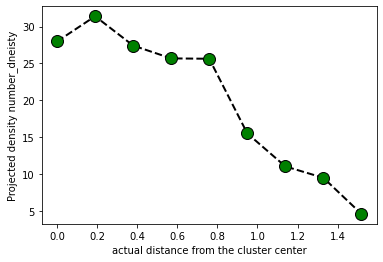

In [75]:
plt.plot(rs,nu_all, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.xlabel('actual distance from the cluster center')
plt.ylabel('Projected density number_dneisty')
plt.show()

Text(0, 0.5, 'RA')

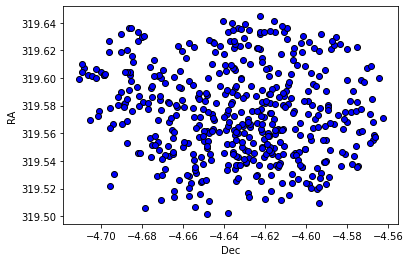

In [76]:
plt.plot(dec,ra,color='black', linestyle='none', linewidth = 2, marker='.', markerfacecolor='blue', markersize=12)
plt.xlabel('Dec')
plt.ylabel('RA')

In [81]:
# Peculiar velocities of a members from there spectrosocpic
# redshift and mean redshift of a cluster

c=const.c.to("km/s")
z_cl=z_cluster
los_v=c*(*z -  z_cl)/(1 + z_cl)
los_v
plt.plot(r,los_v, color='black', linestyle='none', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.xlabel('Separation in MPC')
plt.ylabel('velocity dispersion')
plt.show()

TypeError: 'Quantity' object is not callable

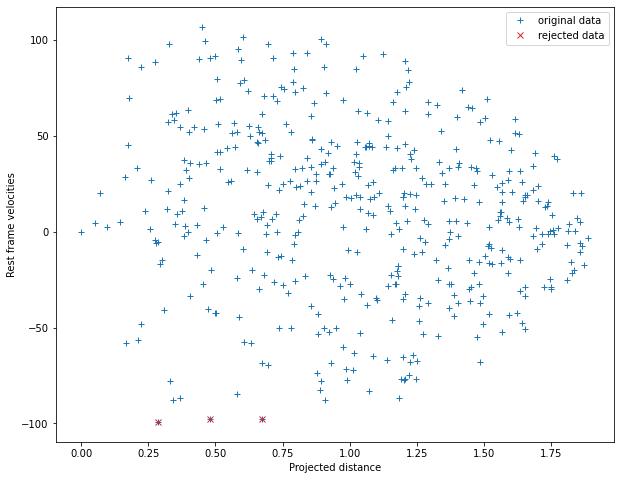

In [78]:
# Further in order to remove the interlopers  the 3 sigma clipping is used 
filtered_data = sigma_clip(los_v, sigma=2.5, maxiters=10000)

#clipped=sigma_clipped_stats(los_v, sigma=3, maxiters=1000)


# plot the original and rejected data
plt.figure(figsize=(10,8))

plt.plot(r_proj,los_v, '+', color='#1f77b4', label="original data")
plt.plot(r_proj[filtered_data.mask], los_v[filtered_data.mask], 'x',color='#d62728', label="rejected data")
plt.xlabel('Projected distance')
plt.ylabel('Rest frame velocities')
plt.legend(loc=1, numpoints=1)


In [79]:
# from the simulation file haing X,Y and Z component of velocity just for comparision
v=np.sqrt(data.HALO_vx_2**2+data.HALO_vy_2**2+data.HALO_vz_2**2)
v

array([ 528.4329 , 1011.3637 , 1179.0557 , 2199.3674 , 1533.4362 ,
        461.66934, 1174.3005 , 1900.7496 ,  959.7508 , 1211.5326 ,
       1968.8427 , 2170.631  , 2379.7432 , 3066.2432 , 1901.3412 ,
       1491.7676 , 1968.2402 , 2390.0676 , 2664.8618 , 2278.055  ,
       1474.3668 , 1824.2435 , 2272.4592 , 2868.8103 , 1232.4895 ,
       3326.6682 , 2819.404  , 1027.7471 , 2243.9756 , 1104.4717 ,
       1745.4115 , 1288.1918 ,  652.4265 , 2351.8906 , 2386.7688 ,
       2274.201  , 1932.4705 , 1440.0452 , 1733.0145 , 1575.3097 ,
       2177.0618 , 2951.3406 , 2749.722  , 2370.3723 , 1329.2228 ,
       2878.0544 , 1927.3971 , 1074.6936 , 1808.654  , 1804.6418 ,
       2474.2747 , 2106.165  , 1860.872  ,  556.686  , 1465.8196 ,
       2719.9734 ,  543.2542 ,  484.65192, 1563.1349 , 1208.8895 ,
        971.99567, 1971.998  , 2625.7954 , 2899.1648 , 2434.3914 ,
       2806.5908 , 2668.867  , 2044.9984 , 1915.7244 , 1277.3885 ,
       1902.7808 , 1355.1108 , 2479.972  , 1849.7854 , 1894.75